1) Full Code (Iris Dataset ML Project)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


2) Load Iris Dataset into Pandas DataFrame

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["species"] = df["target"].apply(lambda x: iris.target_names[x])

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


3) Basic Data Exploration (Important for ML)

In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)

print("\nInfo:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

print("\nTarget counts:")
print(df["species"].value_counts())


Shape: (150, 6)

Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.

## 4) Visualization using Matplotlib

(A) Scatter Plot: Sepal Length vs Sepal Width

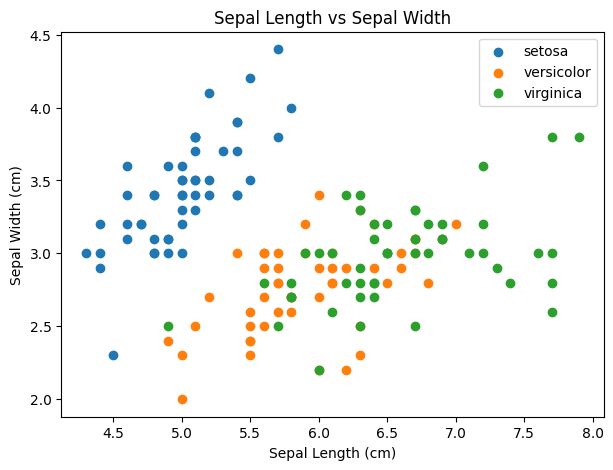

In [4]:
plt.figure(figsize=(7, 5))

for sp in df["species"].unique():
    subset = df[df["species"] == sp]
    plt.scatter(subset["sepal length (cm)"], subset["sepal width (cm)"], label=sp)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.show()


(B) Scatter Plot: Petal Length vs Petal Width (Best for separation)

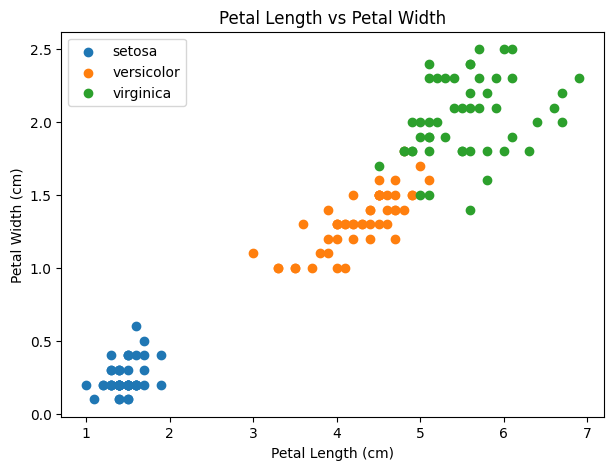

In [5]:
plt.figure(figsize=(7, 5))

for sp in df["species"].unique():
    subset = df[df["species"] == sp]
    plt.scatter(subset["petal length (cm)"], subset["petal width (cm)"], label=sp)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()


(C) Histogram: Feature Distribution Example

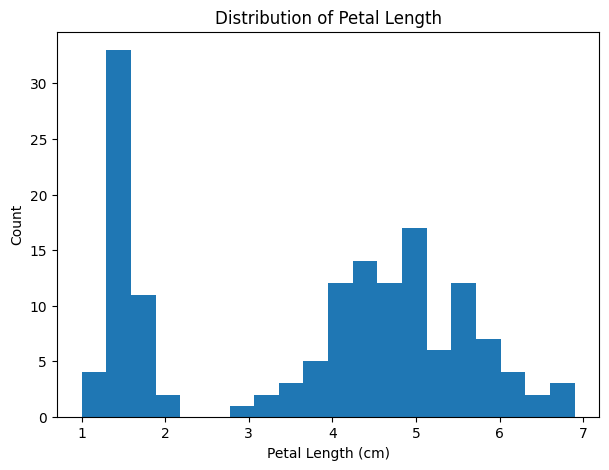

In [6]:
plt.figure(figsize=(7, 5))
plt.hist(df["petal length (cm)"], bins=20)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Count")
plt.title("Distribution of Petal Length")
plt.show()


5) Feature Selection (X) and Target (y)

In [7]:
X = df[iris.feature_names]  # all 4 features
y = df["target"]            # 0,1,2

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (150, 4)
y shape: (150,)


6) Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (120, 4)
Test size: (30, 4)


7) Standard Scaling (Very Common in ML)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



8) Train ML Model (Logistic Regression)

In [10]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


## 9) Model Evaluation

Accuracy

In [11]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9333333333333333


Confusion Matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


Classification Report

In [13]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



10) Bonus: Predict a New Flower (Real Example)

In [14]:
# Example flower measurements:
# sepal length, sepal width, petal length, petal width
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])

new_flower_scaled = scaler.transform(new_flower)
prediction = model.predict(new_flower_scaled)

print("Predicted class:", prediction[0])
print("Predicted species:", iris.target_names[prediction[0]])


Predicted class: 0
Predicted species: setosa


c:\Models and Algo\Models\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
